***Objectif du projet:***
    
   1 - Exploration des données et analyse statistique sur Python.<br>
   2 - Modélisation à l’aide d’algorithme d’apprentissage supervisé <br>
   3 - Restitution des résultats en soutenance 

In [38]:
### Importons les librairies necessaires au traitement 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [65]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as ex
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.offline as pyo
pyo.init_notebook_mode()
import string
import re
import nltk
from wordcloud import WordCloud,STOPWORDS
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from keras import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os
import collections
def RMSE(Y,YHAT):
    return np.sqrt(mean_squared_error(Y,YHAT))

stopwords=list(STOPWORDS)

plt.rc('figure',figsize=(20,11))

def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed()

In [66]:
### chargeons les données
df = pd.read_csv('listings.csv')

In [67]:
df.head()

id                        listing_url       scrape_id last_scraped  \
0  2577  https://www.airbnb.com/rooms/2577  20210410122610   2021-04-14   
1  3109  https://www.airbnb.com/rooms/3109  20210410122610   2021-04-13   
2  5396  https://www.airbnb.com/rooms/5396  20210410122610   2021-04-16   
3  7397  https://www.airbnb.com/rooms/7397  20210410122610   2021-04-16   
4  7964  https://www.airbnb.com/rooms/7964  20210410122610   2021-04-13   

                                name  \
0   Loft for 4 by Canal Saint Martin   
1                       zen and calm   
2     Explore the heart of old Paris   
3   MARAIS - 2ROOMS APT - 2/4 PEOPLE   
4  Large & sunny flat with balcony !   

                                         description  \
0  100 m2 loft (1100 sq feet) with high ceiling, ...   
1  <b>The space</b><br />I bedroom appartment in ...   
2  Cozy, well-appointed and graciously designed s...   
3  VERY CONVENIENT, WITH THE BEST LOCATION !<br /...   
4  Very large & nice apartment all for you! <br /...   

                               neighborhood_overview  \
0                                                NaN   
1  Good restaurants<br />very close the Montparna...   
2  You are within walking distance to the Louvre,...   
3                                                NaN   
4                                                NaN   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/09da057c-0120...     2827   
1  https://a0.muscache.com/pictures/baeae9e2-cd53...     3631   
2  https://a0.muscache.com/pictures/52413/f9bf76f...     7903   
3  https://a0.muscache.com/pictures/67928287/330b...     2626   
4  https://a0.muscache.com/pictures/4471349/6fb3d...    22155   

                                  host_url  ... review_scores_communication  \
0   https://www.airbnb.com/users/show/2827  ...                        10.0   
1   https://www.airbnb.com/users/show/3631  ...                        10.0   
2   https://www.airbnb.com/users/show/7903  ...                        10.0   
3   https://www.airbnb.com/users/show/2626  ...                        10.0   
4  https://www.airbnb.com/users/show/22155  ...                        10.0   

  review_scores_location review_scores_value        license instant_bookable  \
0                   10.0                10.0            NaN                f   
1                   10.0                10.0            NaN                f   
2                   10.0                 9.0  7510402838018                f   
3                   10.0                10.0  7510400829623                f   
4                   10.0                10.0  7510903576564                f   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                              1                                           1   
1                              1                                           1   
2                              1                                           1   
3                              1                                           1   
4                              1                                           1   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              0.04  
1                                           0              0.17  
2                                           0              1.65  
3                                           0              2.23  
4                                           0              0.05  

[5 rows x 74 columns]

In [68]:
df.shape

(63090, 74)

* comme on peut le voir, il y a:<br>
63090 lignes <br>
74 colonnes

In [69]:
### pour mner à bien notre analyse, verifions quel type de donner avons en face
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63090 entries, 0 to 63089
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            63090 non-null  int64  
 1   listing_url                                   63090 non-null  object 
 2   scrape_id                                     63090 non-null  int64  
 3   last_scraped                                  63090 non-null  object 
 4   name                                          63028 non-null  object 
 5   description                                   61681 non-null  object 
 6   neighborhood_overview                         37484 non-null  object 
 7   picture_url                                   63089 non-null  object 
 8   host_id                                       63090 non-null  int64  
 9   host_url                                      63090 non-null 

In [72]:
df['neighbourhood_cleansed']

0              Entrepôt
1          Observatoire
2        Hôtel-de-Ville
3        Hôtel-de-Ville
4                 Opéra
              ...      
63085             Opéra
63086             Opéra
63087    Hôtel-de-Ville
63088             Passy
63089      Observatoire
Name: neighbourhood_cleansed, Length: 63090, dtype: object

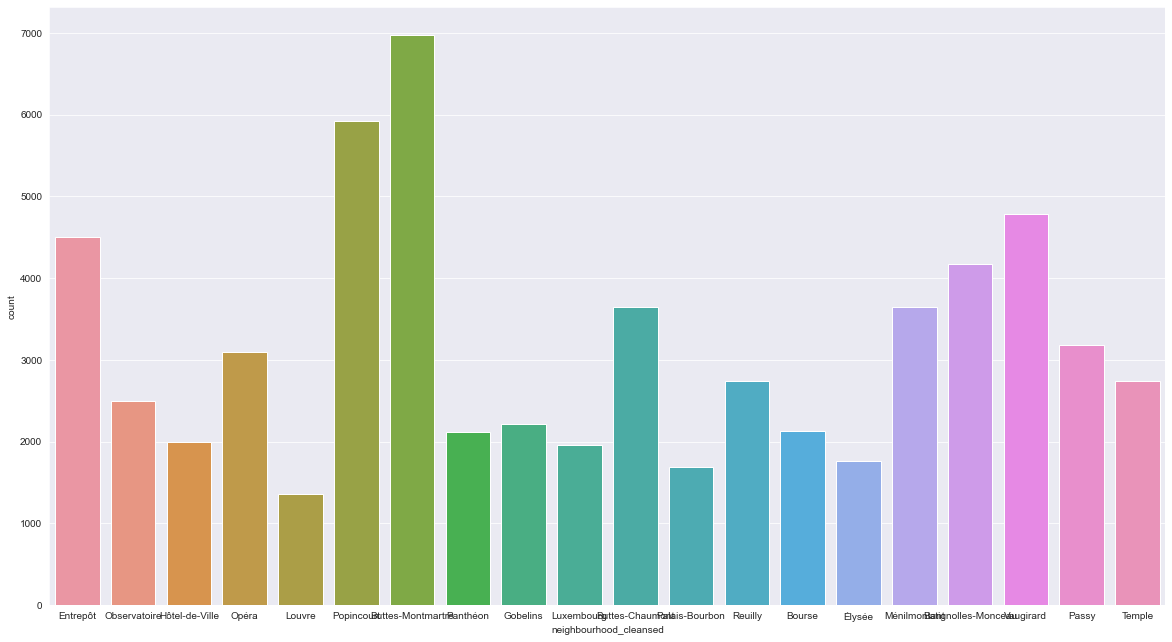

In [73]:
ax = sns.countplot(x="neighbourhood_cleansed", data=df)##neighbourhood_group_cleansed 

In [44]:
### maitenant que savosn cela, verirfions s'il ya des donnes dupliqueés et manquantes et les ecarter
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [45]:
df.shape ### pas de données dupliquées

(63090, 74)

In [46]:
df.isnull()

id  listing_url  scrape_id  last_scraped   name  description  \
0      False        False      False         False  False        False   
1      False        False      False         False  False        False   
2      False        False      False         False  False        False   
3      False        False      False         False  False        False   
4      False        False      False         False  False        False   
...      ...          ...        ...           ...    ...          ...   
63085  False        False      False         False  False        False   
63086  False        False      False         False  False        False   
63087  False        False      False         False  False        False   
63088  False        False      False         False  False        False   
63089  False        False      False         False  False        False   

       neighborhood_overview  picture_url  host_id  host_url  ...  \
0                       True        False    False     False  ...   
1                      False        False    False     False  ...   
2                      False        False    False     False  ...   
3                       True        False    False     False  ...   
4                       True        False    False     False  ...   
...                      ...          ...      ...       ...  ...   
63085                  False        False    False     False  ...   
63086                   True        False    False     False  ...   
63087                   True        False    False     False  ...   
63088                   True        False    False     False  ...   
63089                   True        False    False     False  ...   

       review_scores_communication  review_scores_location  \
0                            False                   False   
1                            False                   False   
2                            False                   False   
3                            False                   False   
4                            False                   False   
...                            ...                     ...   
63085                         True                    True   
63086                         True                    True   
63087                         True                    True   
63088                         True                    True   
63089                         True                    True   

       review_scores_value  license  instant_bookable  \
0                    False     True             False   
1                    False     True             False   
2                    False    False             False   
3                    False    False             False   
4                    False    False             False   
...                    ...      ...               ...   
63085                 True    False             False   
63086                 True    False             False   
63087                 True    False             False   
63088                 True     True             False   
63089                 True    False             False   

       calculated_host_listings_count  \
0                               False   
1                               False   
2                               False   
3                               False   
4                               False   
...                               ...   
63085                           False   
63086                           False   
63087                           False   
63088                           False   
63089                           False   

       calculated_host_listings_count_entire_homes  \
0                                            False   
1                                            False   
2                                            False   
3                                            False   
4                                            False   
...                                          

In [47]:
df.isnull().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                               62
                                                ...  
calculated_host_listings_count                      0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
reviews_per_month                               15306
Length: 74, dtype: int64

In [48]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [75]:
### supprimer les conlones inutiles à notre analyse 
df.drop(['name','id','host_name', 'scrape_id', 'last_scraped', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_about', 'host_picture_url', 'host_listings_count', 'host_has_profile_pic', 'host_thumbnail_url', 'calendar_last_scraped',
        'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms',], axis=1, inplace=True)

In [50]:
df.head()

listing_url  \
0  https://www.airbnb.com/rooms/2577   
1  https://www.airbnb.com/rooms/3109   
2  https://www.airbnb.com/rooms/5396   
3  https://www.airbnb.com/rooms/7397   
4  https://www.airbnb.com/rooms/7964   

                                         description  \
0  100 m2 loft (1100 sq feet) with high ceiling, ...   
1  <b>The space</b><br />I bedroom appartment in ...   
2  Cozy, well-appointed and graciously designed s...   
3  VERY CONVENIENT, WITH THE BEST LOCATION !<br /...   
4  Very large & nice apartment all for you! <br /...   

                               neighborhood_overview  \
0                                                NaN   
1  Good restaurants<br />very close the Montparna...   
2  You are within walking distance to the Louvre,...   
3                                                NaN   
4                                                NaN   

                                         picture_url  \
0  https://a0.muscache.com/pictures/09da057c-0120...   
1  https://a0.muscache.com/pictures/baeae9e2-cd53...   
2  https://a0.muscache.com/pictures/52413/f9bf76f...   
3  https://a0.muscache.com/pictures/67928287/330b...   
4  https://a0.muscache.com/pictures/4471349/6fb3d...   

                           host_location host_response_time  \
0  Casablanca, Grand Casablanca, Morocco       within a day   
1           Paris, Île-de-France, France       within a day   
2             Istanbul, İstanbul, Turkey     within an hour   
3           Paris, Île-de-France, France     within an hour   
4           Paris, Île-de-France, France                NaN   

  host_response_rate host_acceptance_rate host_is_superhost  \
0                50%                  67%                 f   
1                80%                   0%                 f   
2               100%                  92%                 f   
3               100%                  83%                 t   
4                NaN                  NaN                 f   

             host_neighbourhood  ...  review_scores_rating  \
0                    République  ...                 100.0   
1                        Alésia  ...                 100.0   
2  Saint-Paul - Ile Saint-Louis  ...                  90.0   
3                     Le Marais  ...                  94.0   
4  Gare du Nord - Gare de I'Est  ...                  96.0   

  review_scores_accuracy review_scores_cleanliness review_scores_checkin  \
0                   10.0                      10.0                  10.0   
1                   10.0                      10.0                  10.0   
2                    9.0                       9.0                  10.0   
3                   10.0                       9.0                  10.0   
4                   10.0                      10.0                  10.0   

  review_scores_communication  review_scores_location  review_scores_value  \
0                        10.0                    10.0                 10.0   
1                        10.0                    10.0                 10.0   
2                        10.0                    10.0                  9.0   
3                        10.0                    10.0                 10.0   
4                        10.0                    10.0                 10.0   

         license instant_bookable reviews_per_month  
0            NaN                f              0.04  
1            NaN                f              0.17  
2  7510402838018                f              1.65  
3  7510400829623                f              2.23  
4  7510903576564                f              0.05  

[5 rows x 56 columns]

In [51]:
df.drop(['listing_url', 'description', 'picture_url', 'review_scores_communication', 'license', 'instant_bookable',
        'bathrooms_text', 'host_response_time', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'beds', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_90', 'host_location',
        'calendar_updated', 'host_acceptance_rate', 'host_total_listings_count',
        'host_identity_verified', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_cleanliness',
        'review_scores_checkin', 'review_scores_location', 'review_scores_value',
         'availability_60', 'availability_365', 'review_scores_rating', 'review_scores_rating',
         'review_scores_accuracy','host_neighbourhood', 'first_review', 'last_review',
         'host_verifications','neighborhood_overview' 
        ], axis=1, inplace=True)

In [52]:
df.head()

host_response_rate host_is_superhost                 neighbourhood  \
0                50%                 f                           NaN   
1                80%                 f  Paris, Île-de-France, France   
2               100%                 f  Paris, Ile-de-France, France   
3               100%                 t                           NaN   
4                NaN                 f                           NaN   

   latitude  longitude     property_type        room_type  accommodates  \
0  48.86957    2.36127       Entire loft  Entire home/apt             4   
1  48.83191    2.31870  Entire apartment  Entire home/apt             2   
2  48.85247    2.35835  Entire apartment  Entire home/apt             2   
3  48.85909    2.35315  Entire apartment  Entire home/apt             4   
4  48.87417    2.34245  Entire apartment  Entire home/apt             2   

   bathrooms  bedrooms                                          amenities  \
0        NaN       2.0  ["Essentials", "Kitchen", "Heating", "Host gre...   
1        NaN       NaN  ["Smoke alarm", "Dishes and silverware", "Hair...   
2        NaN       NaN  ["Essentials", "TV with standard cable", "Dish...   
3        NaN       2.0  ["Essentials", "TV with standard cable", "Dish...   
4        NaN       1.0  ["Essentials", "TV with standard cable", "Kitc...   

     price  minimum_nights  maximum_nights has_availability  availability_30  \
0  $125.00               3            1125                t                0   
1   $60.00               2              30                t               30   
2   $47.00               1            1125                t               18   
3   $90.00              10             130                t               13   
4  $130.00               6             365                t               30   

   number_of_reviews  reviews_per_month  
0                  1               0.04  
1                  9               0.17  
2                237               1.65  
3                272               2.23  
4                  6               0.05

In [21]:
df.columns

Index(['neighborhood_overview', 'host_response_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_verifications', 'neighbourhood', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'has_availability', 'availability_30', 'number_of_reviews',
       'first_review', 'last_review', 'review_scores_accuracy',
       'reviews_per_month'],
      dtype='object')

In [53]:
df['price'] = df['price'].str.replace(',', '').str.replace('$', '').astype(float)

In [54]:
df.head()

host_response_rate host_is_superhost                 neighbourhood  \
0                50%                 f                           NaN   
1                80%                 f  Paris, Île-de-France, France   
2               100%                 f  Paris, Ile-de-France, France   
3               100%                 t                           NaN   
4                NaN                 f                           NaN   

   latitude  longitude     property_type        room_type  accommodates  \
0  48.86957    2.36127       Entire loft  Entire home/apt             4   
1  48.83191    2.31870  Entire apartment  Entire home/apt             2   
2  48.85247    2.35835  Entire apartment  Entire home/apt             2   
3  48.85909    2.35315  Entire apartment  Entire home/apt             4   
4  48.87417    2.34245  Entire apartment  Entire home/apt             2   

   bathrooms  bedrooms                                          amenities  \
0        NaN       2.0  ["Essentials", "Kitchen", "Heating", "Host gre...   
1        NaN       NaN  ["Smoke alarm", "Dishes and silverware", "Hair...   
2        NaN       NaN  ["Essentials", "TV with standard cable", "Dish...   
3        NaN       2.0  ["Essentials", "TV with standard cable", "Dish...   
4        NaN       1.0  ["Essentials", "TV with standard cable", "Kitc...   

   price  minimum_nights  maximum_nights has_availability  availability_30  \
0  125.0               3            1125                t                0   
1   60.0               2              30                t               30   
2   47.0               1            1125                t               18   
3   90.0              10             130                t               13   
4  130.0               6             365                t               30   

   number_of_reviews  reviews_per_month  
0                  1               0.04  
1                  9               0.17  
2                237               1.65  
3                272               2.23  
4                  6               0.05

In [55]:
df.describe()

latitude     longitude  accommodates  bathrooms      bedrooms  \
count  63090.000000  63090.000000   63090.00000        0.0  50067.000000   
mean      48.864103      2.345181       3.03690        NaN      1.372361   
std        0.018366      0.033451       1.59508        NaN      0.967071   
min       48.811740      2.220240       0.00000        NaN      1.000000   
25%       48.850710      2.324132       2.00000        NaN      1.000000   
50%       48.865380      2.348080       2.00000        NaN      1.000000   
75%       48.879020      2.370360       4.00000        NaN      2.000000   
max       48.905530      2.475420      16.00000        NaN     50.000000   

              price  minimum_nights  maximum_nights  availability_30  \
count  63090.000000    63090.000000    6.309000e+04     63090.000000   
mean     112.915232        6.032224    8.527554e+02         8.610382   
std      193.989353       45.303764    3.981708e+04        12.420076   
min        0.000000        1.000000    1.000000e+00         0.000000   
25%       58.000000        1.000000    3.000000e+01         0.000000   
50%       80.000000        2.000000    1.125000e+03         0.000000   
75%      120.000000        4.000000    1.125000e+03        23.000000   
max    11600.000000     9999.000000    1.000000e+07        30.000000   

       number_of_reviews  reviews_per_month  
count       63090.000000       47784.000000  
mean           18.768806           0.631386  
std            40.943593           0.971980  
min             0.000000           0.010000  
25%             1.000000           0.110000  
50%             5.000000           0.300000  
75%            18.000000           0.770000  
max           895.000000          32.660000

#### Inspectons le prix

<AxesSubplot:xlabel='price', ylabel='Density'>

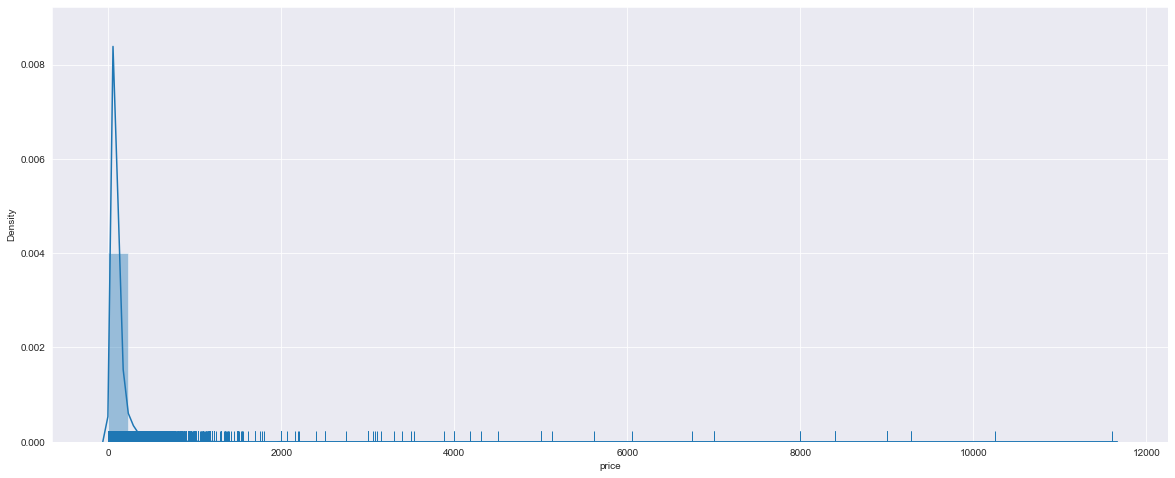

In [61]:
plt.figure(figsize=(20,8))
sns.distplot(df['price'], rug=True)

###### Voyons comment le domaine affecte le prix

Text(0.5, 1.0, 'Missing Values Proportion')

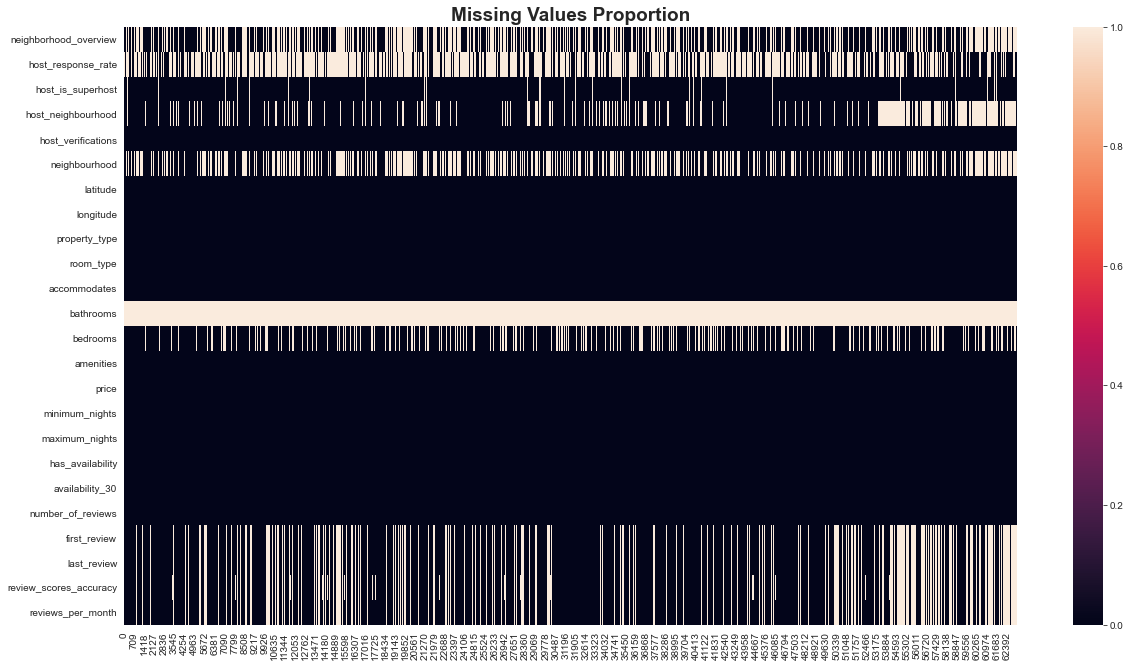

In [18]:
ax = sns.heatmap(df.isna().T)
ax.set_title('Missing Values Proportion',fontsize=19,fontweight='bold')

In [19]:
numeric_features = [t[0] for t in df.dtypes if t[1] == 'int']

KeyError: 'There are no fields in dtype object.'

NameError: name 'numeric_features' is not defined

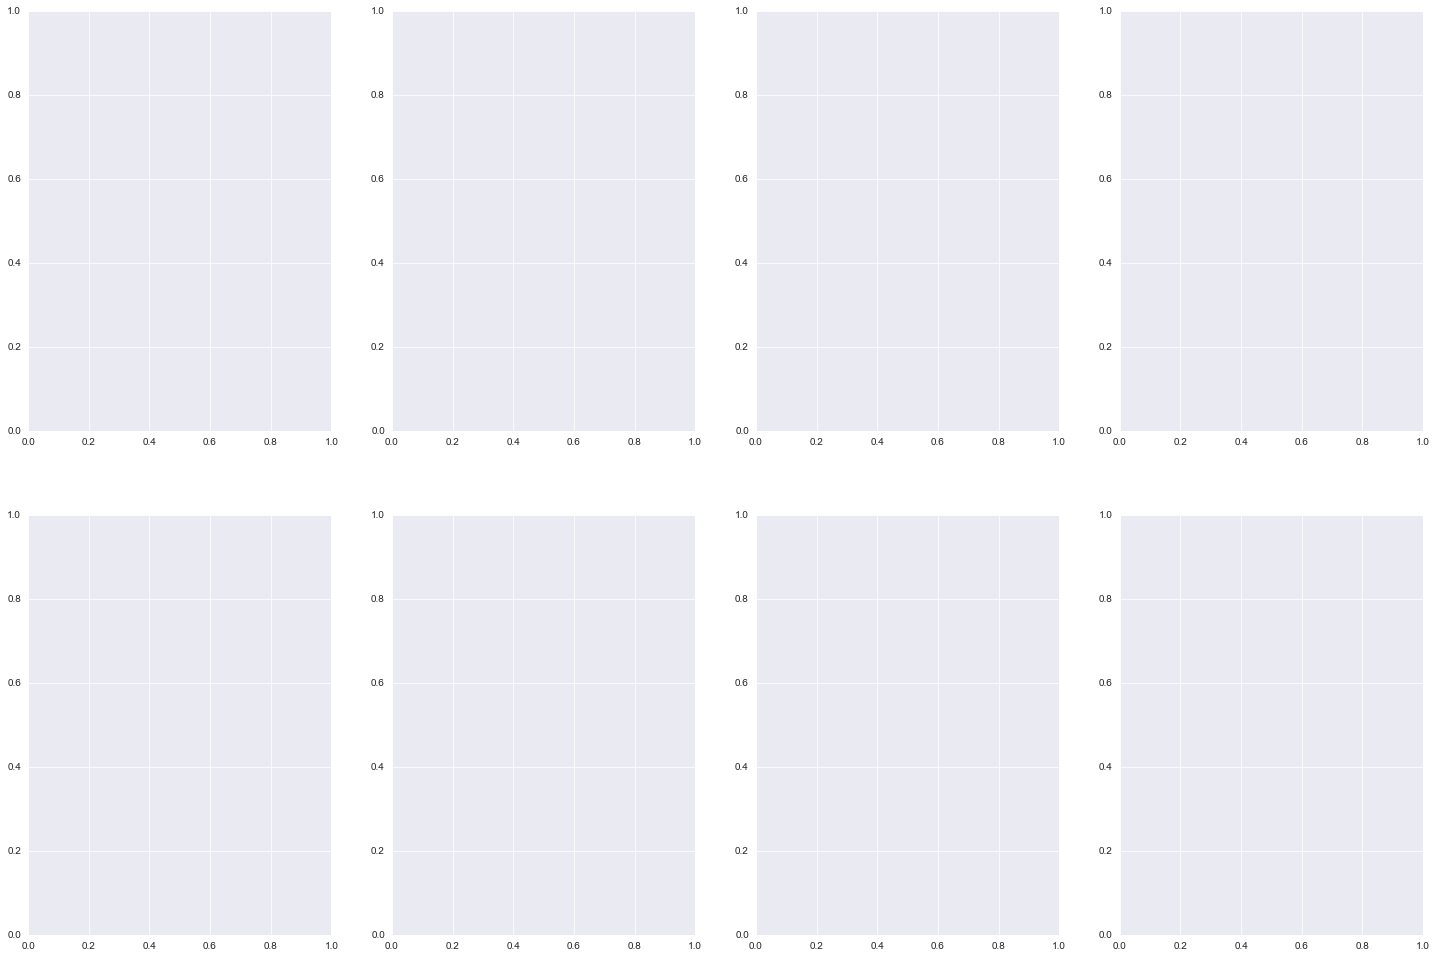

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=4)
aux = 0
fig.set_figheight(17)
fig.set_figwidth(25)
for row in axes:
    for col in row:
        df[numeric_features[aux]].plot(kind='kde',ax=col)
        col.set_title(numeric_features[aux] +' Distribution',fontsize=16,fontweight='bold')
        aux+=1

In [19]:
#df.dropna(how='any',inplace=True) 